# CONTEC DIOの利用法

2023.12.9 HAI技術士事務所

CONTEC製USBデジタルIOの使い方をまとめます。  
取説が非常に分かりにくいのでこれを参考にして下さい。

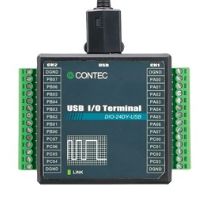

### １．ドライバ、開発環境のインストール  
注意点：製品に添付されているCD、紙の取説は使用しません。  
  
・CONTECのHPから以下のドライバーをダウンロードし解凍する。Ver.7.90以降でpythonが実行出来ます。  
Windows版高機能デジタル入出力ドライバ API-DIO(WDM) 開発環境(フルセット) Ver. 7.90　　  
  
・まだ本体とPCを接続せずに以下のインストール作業を進めます。    

・解凍したフォルダから以下のSetup.exeを実行します。  
LZF826DIOWDM_790F\INF\WDM\Dio_forWin10\Setup.exe  
  
・解凍したフォルダから以下のSetup.exeを実行します。インストールが完了するとReadme.txtが開きます。  
デスクトップに「CONTEC API-PAC(W32)のフォルダが生成されます。  
LZF826DIOWDM_790F\APIPAC\DioWdm\Disk1\Setup.exe  

・DIO本体をUSBでPCに接続し、PCを再起動します。  
・再起動後、コントロールパネル → デバイスマネージャー → CONTEC Devices → DIO DIO-0808LY-USBをダブルクリックします。  
・プロパティ画面でドライバータブを選択し、バージョンが7.9.0になっていればOKです。  
・同じプロパティ画面の共通設定タブでデバイス名を任意で入れます。（後でプログラムで使います。）

### ２．動作の確認方法
・コントロールパネル → デバイスマネージャー → CONTEC Devices → DIO DIO-0808LY-USBをダブルクリックする。  
・プロパティ画面のドライバータブを選択し「診断」を押すとこのような診断画面でIOのON/OFF状態が確認出来ます。  
・今回はInput、outputそれぞれ8chのものなので、port番号は0でそれぞれbit0～bit7まであります。  
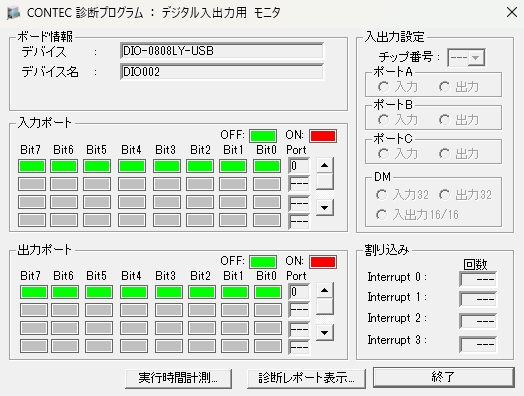

### ３．pythonでのプログラム
・C:\Program Files (x86)\CONTEC\API-PAC(W32)\DIOWDM\Sample\Python3\Dio\inoutフォルダにある「cdio.py」を使いたいフォルダに移動します。

### ３－１．入力プログラム
入力ビットの状態（ONで1、OFFで0）をpythonから読み取ります。

In [ ]:
# 入力プログラム
import ctypes
import cdio

# デバイス名
dev_name = 'DIO002'

on_off = 0x00  # 入力時は使いません
bit_no = 0     # 8chの場合、0～7

dio_id = ctypes.c_short()
io_data = ctypes.c_ubyte(on_off)
bit_no = ctypes.c_short(bit_no) 

# デバイスの初期化
ret = cdio.DioInit(dev_name.encode(),ctypes.byref(dio_id))
print(ret, ': 0なら初期化完了')

# 入力
out = cdio.DioInpBit(dio_id,bit_no,io_data)
print('bit',bit_no.value,'の入力状態は',io_data.value)

# ドライバ終了処理
ret = cdio.DioExit(dio_id)

print(out,': 0なら出力正常に完了')

### ３－２．出力プログラム
pythonから指定のビットをON-OFFし、24V機器を動作させます。

In [ ]:
# 出力プログラム
import ctypes
import cdio

# デバイス名
dev_name = 'DIO002'

on_off = 0x01  # 0x00でOFF,0x01でON
bit_no = 7     # 8chの場合、0～7

dio_id = ctypes.c_short(0)  #1つだけの場合は()でオーケー
io_data = ctypes.c_ubyte(on_off)
bit_no = ctypes.c_short(bit_no) 

# デバイスの初期化
ret = cdio.DioInit(dev_name.encode(),ctypes.byref(dio_id))
print(ret, ': 0なら初期化完了')

# 出力
out = cdio.DioOutBit(dio_id,bit_no,io_data)

# ドライバ終了処理
ret = cdio.DioExit(dio_id)

print(out,': 0なら出力正常に完了')

### ４．実際に使うコード  

In [ ]:
import ctypes
import cdio

# 初期化
dev_name = 'DIO002'
dio_id = ctypes.c_short(0)   #複数台接続している場合は0,1,...の数値を入れる
io_data = ctypes.c_ubyte()
ret = cdio.DioInit(dev_name.encode(),ctypes.byref(dio_id))
print(ret)       # 0なら初期化完了

In [ ]:
# out4 を OFF (0x00)
off_4 = cdio.DioOutBit(dio_id,ctypes.c_short(4),ctypes.c_ubyte(0x00))

# out7 を ON（0x01）
on_7 = cdio.DioOutBit(dio_id,ctypes.c_short(7),ctypes.c_ubyte(0x01))

In [ ]:
# input4の状態を読み込む
cdio.DioInpBit(dio_id, ctypes.c_short(4), io_data)

print(io_data.value)

### ５．配線図

・コネクタの信号名称  
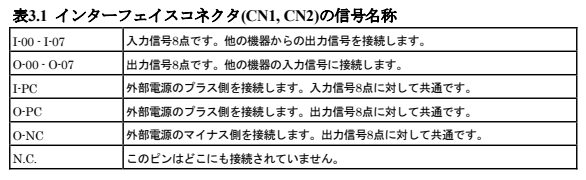

・DIO入力への接続  
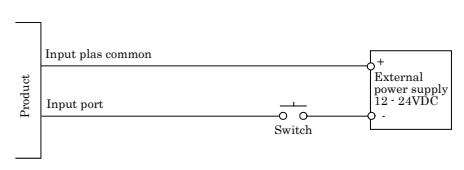

・DIO出力への機器の接続  
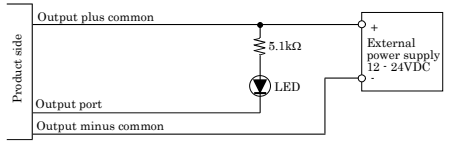